# Versuch 232 Michelson-Interferometer - Auswertung
##### Jan A. Kesting - 24.11.2021

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Berechnung der Wellenlänge

In [2]:
# Messdaten
s_a = np.array([0.025 , 0.022 , 0.042 , 0.074 , 0.032]) * 10**(-3) #m
s_e = np.array([2.956 , 2.977 , 3.009 , 3.039 , 2.993]) * 10**(-3) #m
m = np.array([11073 , 11081 , 11132 , 11156 , 11026])
s_err_sys = 9 * 10**(-9) #m

# Mittelwerte und statistische Fehler:
delta_s = s_e - s_a
delta_s_mean = np.mean(delta_s)
delta_s_err_std = np.std(delta_s)/np.sqrt(5)
delta_s_err_sys = np.sqrt(s_err_sys**2 + s_err_sys**2)
delta_s_err = np.sqrt(delta_s_err_std**2 + delta_s_err_sys**2)

print("Delta s =",delta_s_mean,"+-",delta_s_err,"[m]")
print("Std Delta s:",delta_s_err_std,"[m]")
print("Sys Delta s:", delta_s_err_sys,"[m]")

m_mean = np.mean(m)
m_mean_err = np.std(m)/np.sqrt(5)
print("m =",m_mean,"+-",m_mean_err)

Delta s = 0.0029558 +- 5.840561788047461e-06 [m]
Std Delta s: 5.8405479195020865e-06 [m]
Sys Delta s: 1.2727922061357857e-08 [m]
m = 11093.6 +- 20.51458018093473


In [3]:
# Berechung der Wellenlänge lambda:
lmbda = 2 * delta_s_mean / m_mean
lmbda_err = np.sqrt((2*delta_s_err / m_mean)**2 + (2*delta_s_mean * m_mean_err/ (m_mean)**2)**2)
print("lambda=", lmbda, "+-", lmbda_err, "[m]")

lambda= 5.328838249080551e-07 +- 1.4421457535987462e-09 [m]


In [4]:
# Abweichung vom Literaturwert
lmbda_lit = 532 * 10**(-9) #m
lmbda_lit_err = 1 * 10**(-9)
sigma_lmbda = np.abs(lmbda_lit - lmbda)/(np.sqrt(lmbda_err**2 + lmbda_lit_err**2))
print("Sigma Abweichung Wellenlänge:", sigma_lmbda)

Sigma Abweichung Wellenlänge: 0.5036236092663334


## Bestimmung des Brechungsindex von Luft

In [5]:
delta_m = np.linspace(0,45,10)
p1 = np.array([710, 635, 550, 470, 395, 325, 250, 175, 100, 30]) *133 #Pa
p2 = np.array([720, 645, 570, 495, 425, 350, 280, 200, 125, 55]) *133
p3 = np.array([720, 645, 575, 500, 425, 350, 280, 205, 125, 55]) *133
p_err = 10 *133

Text(0, 0.5, 'Anzahl der vorbeigezogenen Maxima m')

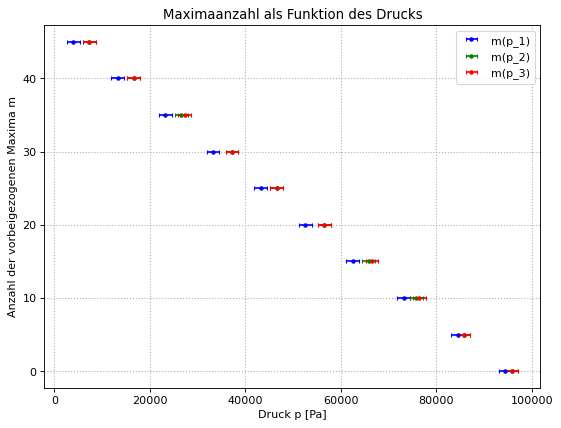

In [6]:
plt.figure(figsize=(8, 6), dpi=80)
plt.title('Maximaanzahl als Funktion des Drucks')
plt.errorbar(p1, delta_m, linestyle="None", marker = ".",color="blue", xerr = p_err , capsize = 2, label="m(p_1)")
plt.errorbar(p2, delta_m, linestyle="None", marker = ".",color="green", xerr = p_err , capsize = 2, label="m(p_2)")
plt.errorbar(p3, delta_m, linestyle="None", marker = ".",color="red", xerr = p_err , capsize = 2, label="m(p_3)")
plt.grid(linestyle=":", linewidth=1)
plt.legend()
plt.xlabel("Druck p [Pa]")
plt.ylabel("Anzahl der vorbeigezogenen Maxima m")

In [7]:
def linear(x,q,b):
    return x*q + b
popt1, pcov1 = curve_fit(linear, p1, delta_m)
popt2, pcov2 = curve_fit(linear, p2, delta_m)
popt3, pcov3 = curve_fit(linear, p3, delta_m)

q1 = popt1[0]
q2 = popt2[0]
q3 = popt3[0]
q1_err = np.sqrt(pcov1[0,0])
q2_err = np.sqrt(pcov2[0,0])
q3_err = np.sqrt(pcov3[0,0])

b1 = popt1[1]
b2 = popt2[1]
b3 = popt3[1]

print("Steigung 1:", q1, "+-", q1_err, "[1/Pa]")
print("Steigung 2:", q2, "+-", q2_err, "[1/Pa]")
print("Steigung 3:", q3, "+-", q3_err, "[1/Pa]")

Steigung 1: -0.0004971968781533741 +- 3.842477651266644e-06 [1/Pa]
Steigung 2: -0.0005086045080985181 +- 1.7321797091008421e-06 [1/Pa]
Steigung 3: -0.0005079818467882637 +- 1.6899525081313712e-06 [1/Pa]


Text(0, 0.5, 'Anzahl der vorbeigezogenen Maxima m')

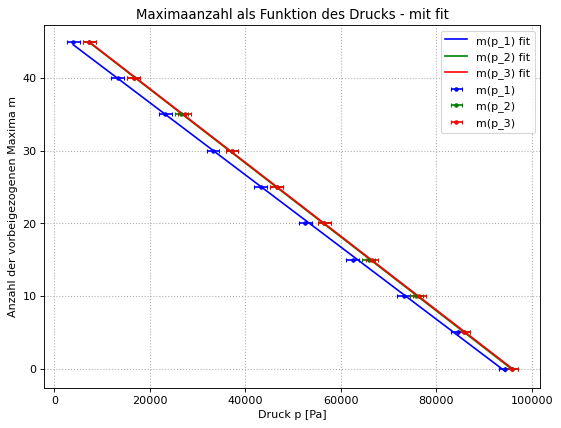

In [8]:
plt.figure(figsize=(8, 6), dpi=80)
plt.title('Maximaanzahl als Funktion des Drucks - mit fit')
plt.errorbar(p1, delta_m, linestyle="None", marker = ".",color="blue", xerr = p_err , capsize = 2, label="m(p_1)")
plt.plot(p1, linear(p1,q1,b1),label="m(p_1) fit",color="blue")
plt.errorbar(p2, delta_m, linestyle="None", marker = ".",color="green", xerr = p_err , capsize = 2, label="m(p_2)")
plt.plot(p2, linear(p2,q2,b2),label="m(p_2) fit",color="green")
plt.errorbar(p3, delta_m, linestyle="None", marker = ".",color="red", xerr = p_err , capsize = 2, label="m(p_3)")
plt.plot(p3, linear(p3,q3,b3),label="m(p_3) fit",color="red")
plt.grid(linestyle=":", linewidth=1)
plt.legend()
plt.xlabel("Druck p [Pa]")
plt.ylabel("Anzahl der vorbeigezogenen Maxima m")

In [9]:
q_mean = abs(np.mean(np.array([q1, q2, q3])))
q_mean_err_sys = np.mean(np.array([q1_err, q2_err, q3_err]))
q_mean_err_std = np.std(np.array([q1, q2, q3]))/np.sqrt(3)
q_mean_err = np.sqrt(q_mean_err_sys**2 + q_mean_err_std**2)

print("Mittlere Steigung:", q_mean, "+-", q_mean_err, "[1/Pa]")

p_0 = 101325
T_0 = 273.15
T = 23.8 + 273.15
T_err = 0.1
a = 0.05 #m
a_err = 0.00005 #m

n_0 = (q_mean * lmbda * p_0 * T) / (2 * a * T_0) + 1
n_0_err = np.sqrt((T_err/T)**2 + (a_err/a)**2 + (q_mean_err/q_mean)**2 + (lmbda_err/lmbda)**2) * n_0

print("Brechungsindex:", n_0, "+-", n_0_err)

n_0_lit = 1.00028
sigma_n_0 = (n_0 - n_0_lit)/(n_0_err)

print("Sigma-Abweichung n:", sigma_n_0)

Mittlere Steigung: 0.0005045944110133852 +- 3.8737528275068e-06 [1/Pa]
Brechungsindex: 1.000296192263738 +- 0.008210552467672747
Sigma-Abweichung n: 0.001972128404463503


## Messung der Kohärenzlänge der Leuchtdiode

In [10]:
data=np.genfromtxt("C:/Users/Jan A. Kesting/Documents/Kohärenzlänge einer Leuchtdiode.csv",delimiter=",",skip_header=18)
print(data)

t=data[:,3:4] # 4. Spalte ausschneiden
t=t[:, 0] # in 1D array wandeln
U=data[:,4:5] # 5. Spalte ausschneiden
U=U[:, 0] # in 1D array wandeln

[[    nan     nan     nan -0.1232 -0.0004     nan]
 [    nan     nan     nan -0.1231  0.0016     nan]
 [    nan     nan     nan -0.123   0.0008     nan]
 ...
 [    nan     nan     nan  0.1247  0.0004     nan]
 [    nan     nan     nan  0.1248  0.0004     nan]
 [    nan     nan     nan  0.1249 -0.0008     nan]]


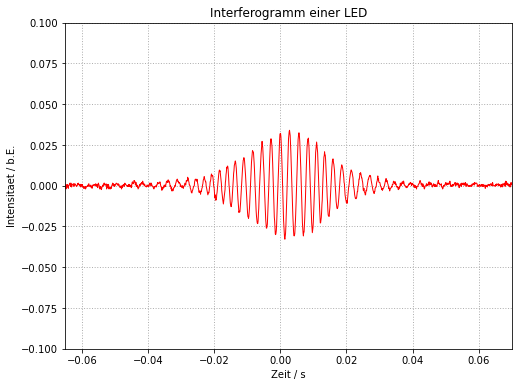

In [11]:
plt.figure(figsize=(8,6))
plt.plot(t,U, color='red', linewidth=1)
plt.xlabel('Zeit / s')
plt.ylabel('Intensitaet / b.E.')
plt.title('Interferogramm einer LED')
plt.axis([-0.065, 0.07, -0.1, 0.1])
plt.grid(linestyle=":", linewidth=1)

In [12]:
from scipy import signal
peakind = signal.find_peaks_cwt(U, np.arange(1,30),noise_perc=20)

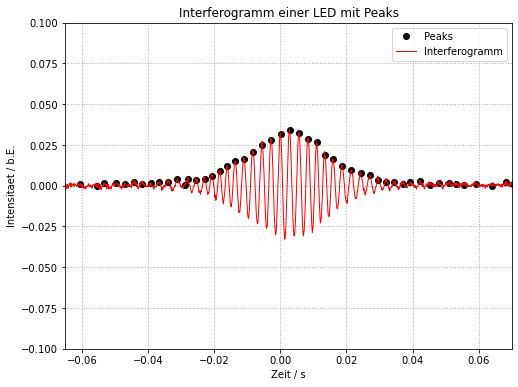

In [13]:
plt.figure(figsize=(8,6))
plt.plot(t[peakind], U[peakind],marker='o',linewidth=0, label="Peaks", color="Black")
plt.plot(t,U, color='red', linewidth=1, label="Interferogramm")
plt.xlabel('Zeit / s')
plt.ylabel('Intensitaet / b.E.')
plt.title('Interferogramm einer LED mit Peaks')
plt.axis([-0.065, 0.07, -0.1, 0.1])
plt.legend()
plt.grid(linestyle=":", linewidth=1)

Sigma-Breite: 0.012720047353870554 +- 0.00026554068511636954 [s]


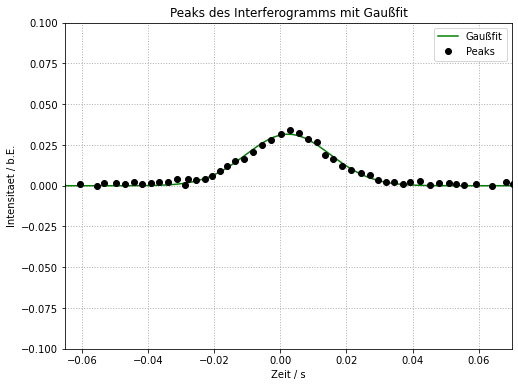

In [14]:
#Fitfunktion Gauss
def fitFunc(t, a, mu, sig):
    return a/np.sqrt(2*np.pi)/sig*np.exp(-(t-mu)**2/(2*sig**2))

popt4, pcov4= curve_fit(fitFunc, t[peakind], U[peakind])
print("Sigma-Breite:", abs(popt4[2]), "+-", np.sqrt(pcov4[2,2]), "[s]")

x=np.linspace(-0.08,0.1,100) #x-Werte fuer die Fitfunktion

plt.figure(figsize=(8,6))
plt.plot(x, fitFunc(x, *popt4), color="green",label="Gaußfit")
plt.plot(t[peakind], U[peakind],marker='o', linewidth=0, color="Black", label="Peaks")
plt.xlabel('Zeit / s')
plt.ylabel('Intensitaet / b.E.')
plt.title('Peaks des Interferogramms mit Gaußfit')
plt.axis([-0.065, 0.07, -0.1, 0.1])
#plt.savefig('interferogramm_3.pdf',format='pdf')
plt.legend()
plt.grid(linestyle=":", linewidth=1)

In [16]:
v = 0.0001 #m/s

sigma_k = abs(popt4[2])
sigma_k_err = np.sqrt(pcov4[2,2])

halbwertsbreite = 2 * np.sqrt(2*np.log(2))*sigma_k
halbwertsbreite_err = 2 * np.sqrt(2*np.log(2)) * sigma_k_err

print("Halbwertsbreite:", halbwertsbreite, "+-",halbwertsbreite_err, "[s]")

l_k = halbwertsbreite * v
l_k_err = halbwertsbreite_err * v

print("Kohärenzlänge:", l_k, "+-", l_k_err, "[m]")

sigma_k: 0.012720047353870554 +- 0.00026554068511636954
Halbwertsbreite: 0.029953422482637267 +- 0.0006253005280832785 [s]
Kohärenzlänge: 2.995342248263727e-06 +- 6.253005280832785e-08 [m]
